In [ ]:
import pandas as pd

# File paths
forest_file_path = r"C:\Users\robin\Downloads\prjct_DF\Bird_Monitoring_Data_FOREST.XLSX"
grassland_file_path = r"C:\Users\robin\Downloads\prjct_DF\Bird_Monitoring_Data_GRASSLAND.XLSX"

# Read and combine all sheets from the FOREST file
forest_sheet_names = pd.ExcelFile(forest_file_path).sheet_names
forest_data = pd.concat([pd.read_excel(forest_file_path, sheet_name=sheet) for sheet in forest_sheet_names], ignore_index=True)

# Read and combine all sheets from the GRASSLAND file
grassland_sheet_names = pd.ExcelFile(grassland_file_path).sheet_names
grassland_data = pd.concat([pd.read_excel(grassland_file_path, sheet_name=sheet) for sheet in grassland_sheet_names], ignore_index=True)

# Combine data from both files
all_sheets = pd.concat([forest_data, grassland_data], ignore_index=True)

# Display the result
print(all_sheets.head())
print("Shape of the combined DataFrame:", all_sheets.shape)


In [22]:
csv_file_path = r"C:\Users\robin\Downloads\Bird_Monitoring_Data_FOREST_grassland_combinednew.csv"
all_sheets.to_csv(csv_file_path, index=False)

In [2]:
df=all_sheets

In [43]:
df.isnull().sum()

Admin_Unit_Code                0
Sub_Unit_Code                  0
Site_Name                      0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
NPSTaxonCode                   0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
TaxonCode                      0
Previously

In [4]:
df['Sub_Unit_Code'] = df['Sub_Unit_Code'].fillna('Unknown')#filled null value with unkown for column Sub_Unit_Code
df['Sex'] = df['Sex'].fillna('Undetermined')#filled null value with Undetermined for column Sex
df['Distance'] = df['Distance'].fillna(0)#filled null value with 0 for column distance because null values represent a meaningful absence (e.g., no distance recorded)
all_sheets['AcceptedTSN'] = all_sheets.groupby('Location_Type')['AcceptedTSN'].transform(
    lambda x: x.fillna(x.mean())
)#filled null value with mean value for column AcceptedTSN  
df['Previously_Obs'] = df['Previously_Obs'].fillna("NA")#filled null value with Notdefined for column Previously_Obs
df['TaxonCode'] = df['TaxonCode'].fillna("NA")#filled null value with Notdefined for column TaxonCode
df['NPSTaxonCode'] = df['NPSTaxonCode'].fillna("NA")#filled null value with Notdefined for column NPSTaxonCode  
df['Site_Name'] = df['Site_Name'].fillna("NA")#filled null value with Notdefined for column Site_Name
df['ID_Method'] = df['ID_Method'].fillna("undefined")#I marked it as 'undefined' because the data was grouped by Observer, Visit, Interval Length, ID Method, and Distance. Based on my assumption, the behavior should either be 'singing' or 'calling.' However, since both behaviors were recorded in the same row, marking it as 'undefined' seemed to be the most appropriate approach.


In [6]:
df.dtypes

Admin_Unit_Code                        object
Sub_Unit_Code                          object
Site_Name                              object
Plot_Name                              object
Location_Type                          object
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                   int64
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                         bool
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
NPSTaxonCode                           object
AOU_Code                               object
PIF_Watchlist_Status              

In [128]:
# Select relevant columns for analysis
relevant_columns = [
     'AOU_Code','Location_Type', "Plot_Name",
    'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 
    'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name',
    'Temperature', 'Humidity', 'Sky', 'Wind', "PIF_Watchlist_Status",'Regional_Stewardship_Status',
    'Disturbance', 'Initial_Three_Min_Cnt','Previously_Obs', 'TaxonCode', 'NPSTaxonCode', 'AcceptedTSN', 'Site_Name', 'Sub_Unit_Code'
]

# Filter the columns in the combined dataframe
filtered_data = all_sheets[relevant_columns]

# Display the first few rows of the filtered data
print(filtered_data.head())
print("Shape of the filtered DataFrame:", filtered_data.shape)

  AOU_Code Location_Type  Plot_Name  Year       Date Start_Time  End_Time  \
0     EATO        Forest  ANTI-0036  2018 2018-05-22   06:19:00  06:29:00   
1     WBNU        Forest  ANTI-0036  2018 2018-05-22   06:19:00  06:29:00   
2     RBWO        Forest  ANTI-0036  2018 2018-05-22   06:19:00  06:29:00   
3     OROR        Forest  ANTI-0036  2018 2018-05-22   06:19:00  06:29:00   
4     NOMO        Forest  ANTI-0036  2018 2018-05-22   06:19:00  06:29:00   

           Observer  Visit Interval_Length  ... PIF_Watchlist_Status  \
0  Elizabeth Oswald      1       0-2.5 min  ...                False   
1  Elizabeth Oswald      1       0-2.5 min  ...                False   
2  Elizabeth Oswald      1     2.5 - 5 min  ...                False   
3  Elizabeth Oswald      1     2.5 - 5 min  ...                False   
4  Elizabeth Oswald      1     2.5 - 5 min  ...                False   

  Regional_Stewardship_Status         Disturbance Initial_Three_Min_Cnt  \
0                        True

In [23]:
# Assign categorical data types to appropriate columns
categorical_columns = [
    'Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 
    'Observer', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 
    'Sex', 'Common_Name', 'Scientific_Name', 'Sky', 'Wind', 'Disturbance', 
    'Initial_Three_Min_Cnt', 'Previously_Obs', 'TaxonCode', 'NPSTaxonCode', 
    'PIF_Watchlist_Status', 'Regional_Stewardship_Status'
]

for column in categorical_columns:
    df[column] = df[column].astype('category')

# Display the data types to verify the changes
print(df.dtypes)

Admin_Unit_Code                      category
Sub_Unit_Code                        category
Site_Name                            category
Plot_Name                            category
Location_Type                        category
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                             category
Visit                                   int64
Interval_Length                      category
ID_Method                            category
Distance                             category
Flyover_Observed                     category
Sex                                  category
Common_Name                          category
Scientific_Name                      category
AcceptedTSN                           float64
NPSTaxonCode                         category
AOU_Code                               object
PIF_Watchlist_Status              

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
db=pd.DataFrame(filtered_data)

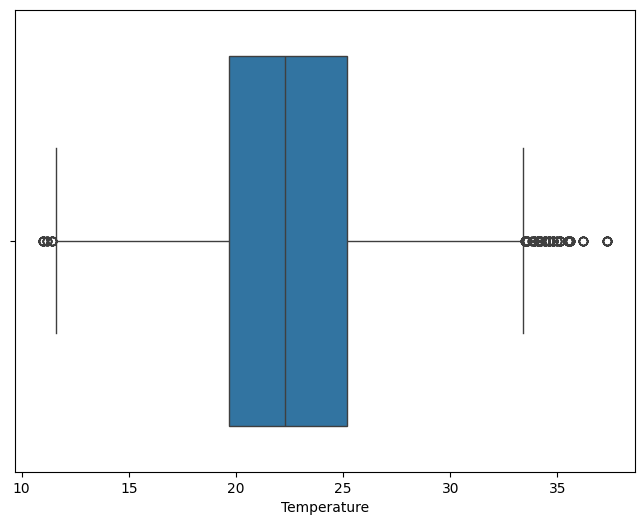

In [24]:
#found outliers in the Temperature column
import matplotlib.pyplot as plt  
import seaborn as sns

# Create a figure with the correct size
plt.figure(figsize=(8, 6))

# Create a boxplot for the 'Temperature' column
sns.boxplot(x=filtered_data['Temperature'])

# Show the plot
plt.show()


<Axes: xlabel='Temperature'>

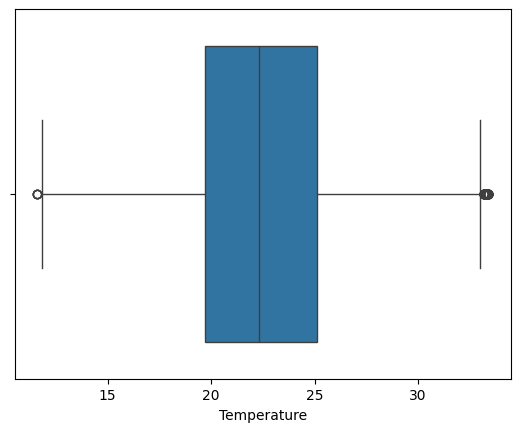

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = db['Temperature'].quantile(0.25)
Q3 = db['Temperature'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
db_filtered = db[(db['Temperature'] >= lower_bound) & (db['Temperature'] <= upper_bound)]

# Plot the boxplot without outliers
sns.boxplot(x=db_filtered["Temperature"])

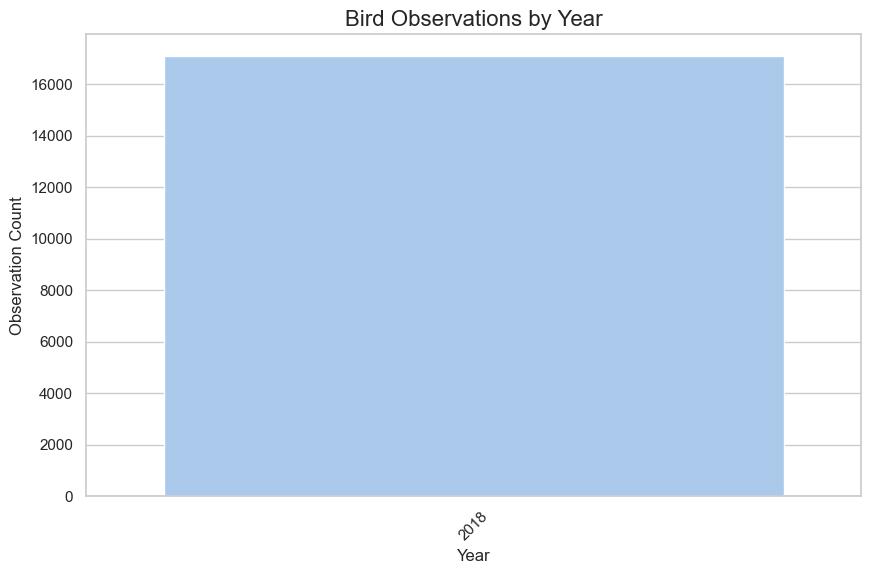

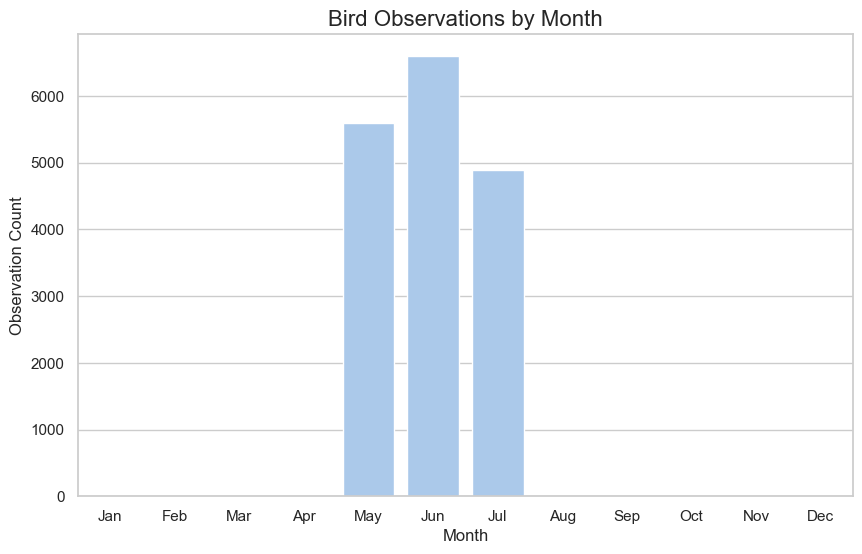

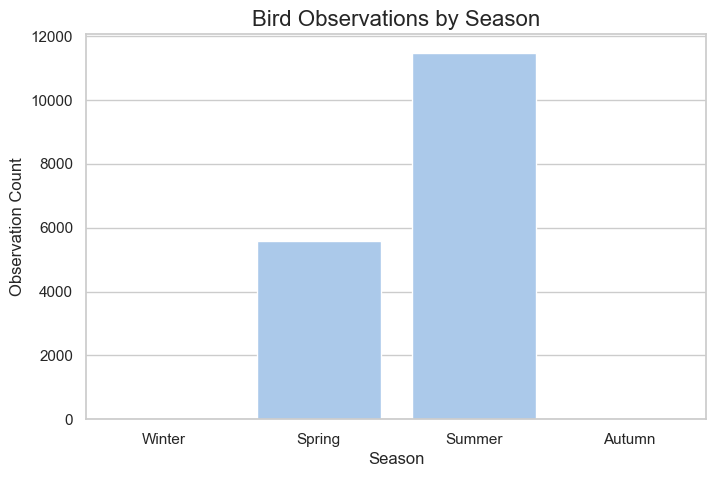

In [30]:
#EDA
#1.Seasonal Trends:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for better visualization
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Extract additional temporal data
db['Month'] = db['Date'].dt.month
db['Season'] = db['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

# Temporal Analysis: Bird Observations by Year
plt.figure(figsize=(10, 6))
sns.countplot(data=db, x='Year', order=sorted(db['Year'].unique()))
plt.title("Bird Observations by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Observation Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Temporal Analysis: Bird Observations by Month
plt.figure(figsize=(10, 6))
sns.countplot(data=db, x='Month', order=range(1, 13))
plt.title("Bird Observations by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Observation Count", fontsize=12)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

# Temporal Analysis: Bird Observations by Season
plt.figure(figsize=(8, 5))
sns.countplot(data=db, x='Season', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title("Bird Observations by Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Observation Count", fontsize=12)
plt.show()


C:\Users\robin\AppData\Local\Temp\ipykernel_11708\1870599498.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='start_hour', data=db, palette='coolwarm')


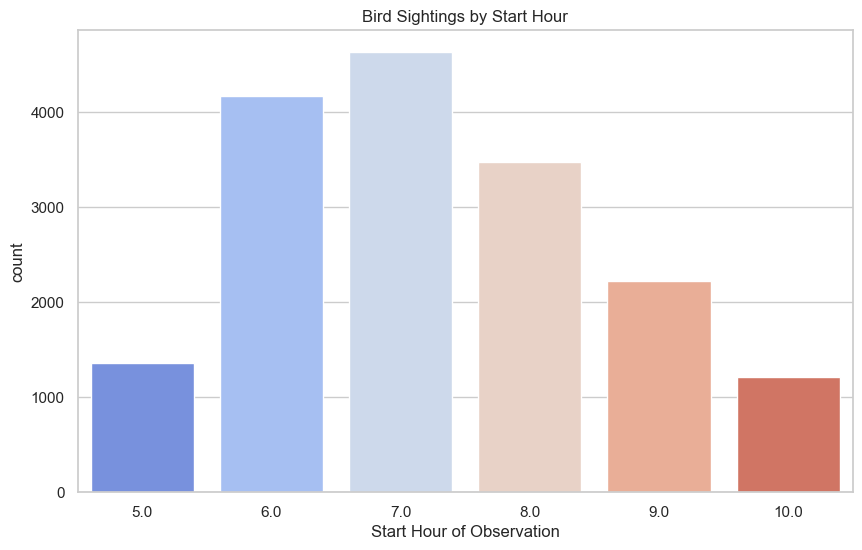

C:\Users\robin\AppData\Local\Temp\ipykernel_11708\1870599498.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='end_hour', data=db, palette='viridis')


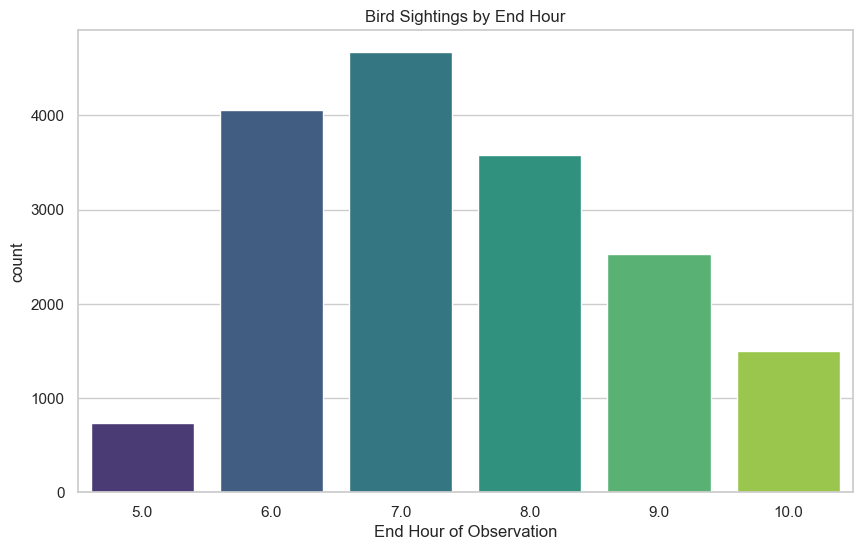

In [47]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
if 'start_time' in db.columns and 'end_time' in db.columns:
    db['start_hour'] = pd.to_datetime(db['start_time'], format='%H:%M:%S').dt.hour
    db['end_hour'] = pd.to_datetime(db['end_time'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='start_hour', data=db, palette='coolwarm')
plt.title('Bird Sightings by Start Hour')
plt.xlabel('Start Hour of Observation')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='end_hour', data=db, palette='viridis')
plt.title('Bird Sightings by End Hour')
plt.xlabel('End Hour of Observation')
plt.show()

   

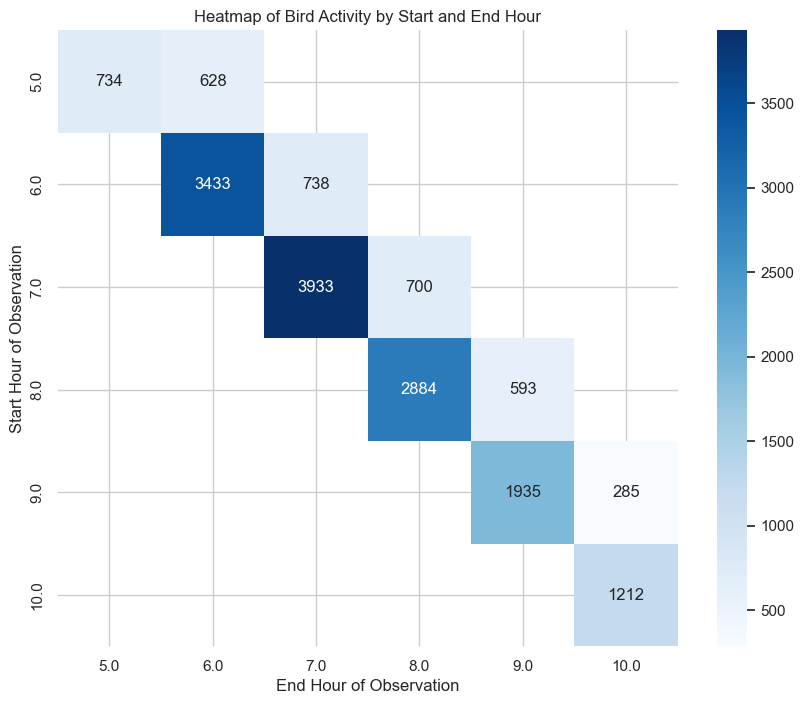

In [42]:
# Ensure 'start_hour' and 'end_hour' columns are created
if 'Start_Time' in db.columns and 'End_Time' in db.columns:
	db['start_hour'] = pd.to_datetime(db['Start_Time'], format='%H:%M:%S').dt.hour
	db['end_hour'] = pd.to_datetime(db['End_Time'], format='%H:%M:%S').dt.hour

# Heatmap for Observation Density
time_activity = db.groupby(['start_hour', 'end_hour']).size().reset_index(name='count')
pivot_table = time_activity.pivot(index='start_hour', columns='end_hour', values='count')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap of Bird Activity by Start and End Hour')
plt.xlabel('End Hour of Observation')
plt.ylabel('Start Hour of Observation')
plt.show()

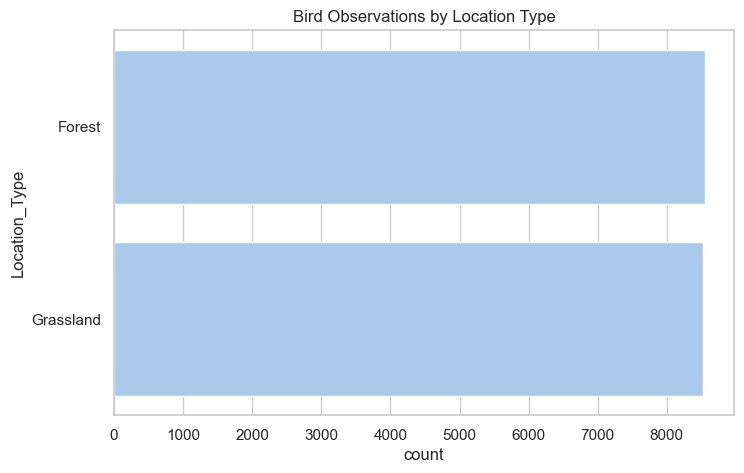

In [53]:
#2.Spatial Analysis - Location Insights

Location_Type  = db['Location_Type'].value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(y='Location_Type', data=db, order=db['Location_Type'].value_counts().index)
plt.title('Bird Observations by Location Type')
plt.show()

C:\Users\robin\AppData\Local\Temp\ipykernel_11708\1876814087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n_species, x='Plot_Name', y='Unique_Species_Count', palette='viridis')


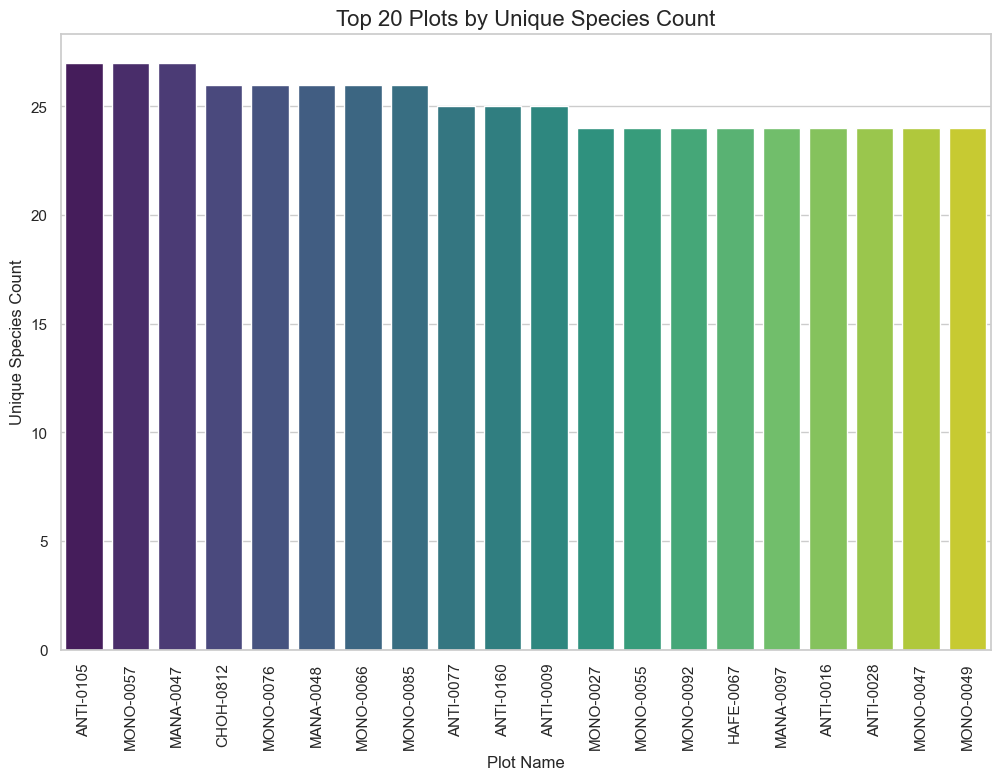

In [95]:
# Top N plots by unique species count
top_n = 20
top_n_species = species_per_plot.sort_values('Unique_Species_Count', ascending=False).head(top_n)

# Plot for top N plots
plt.figure(figsize=(12, 8))
sns.barplot(data=top_n_species, x='Plot_Name', y='Unique_Species_Count', palette='viridis')
plt.title(f'Top {top_n} Plots by Unique Species Count', fontsize=16)
plt.xlabel('Plot Name', fontsize=12)
plt.ylabel('Unique Species Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()


Unique species observed: 127
Species distribution across Location_Type:
Location_Type
Forest       108
Grassland    107
Name: Scientific_Name, dtype: int64
Most common activity types based on Interval_Length:
Interval_Length
0-2.5 min       8614
2.5 - 5 min     3410
5 - 7.5 min     2720
7.5 - 10 min    2333
Name: count, dtype: int64
Most common methods of observation:
ID_Method
Singing          9863
Calling          4061
Visualization    3151
undefined           2
Name: count, dtype: int64
Sex Ratio for different species:
Sex                     Female  Male  Undetermined
Scientific_Name                                   
Accipiter cooperii           0     0             2
Agelaius phoeniceus         21   231           177
Aix sponsa                   0     2             2
Ammodramus savannarum        0   355            32
Anas platyrhynchos           0     1             3
...                        ...   ...           ...
Vireo gilvus                 0    32            26
Vireo griseus

C:\Users\robin\AppData\Local\Temp\ipykernel_11708\1118321211.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location_Type', data=singing_activity, palette='Set2')


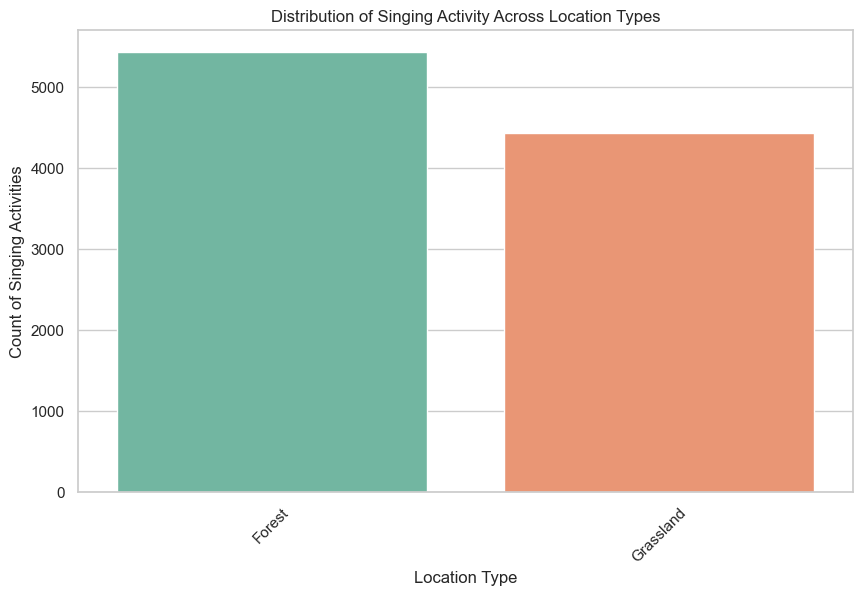

C:\Users\robin\AppData\Local\Temp\ipykernel_11708\1118321211.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location_Type', data=db, palette='Set2')


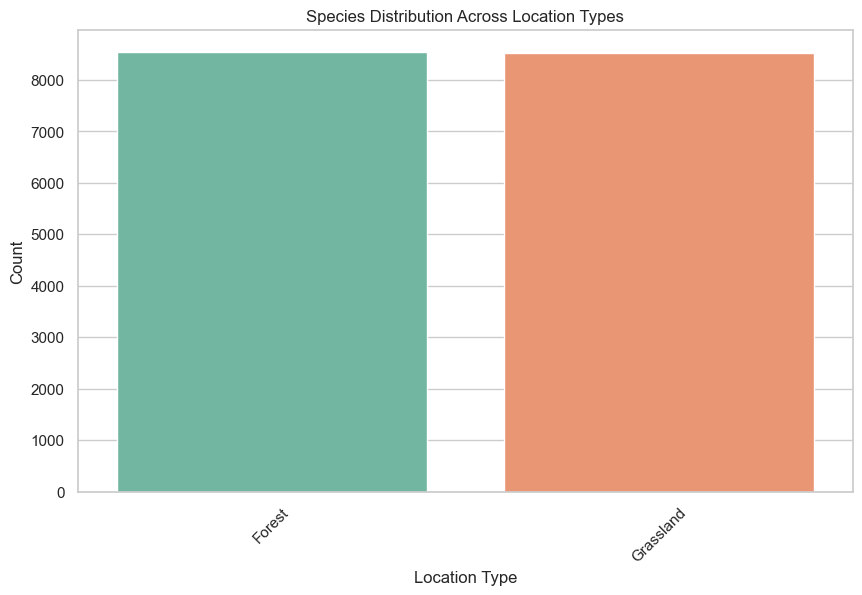

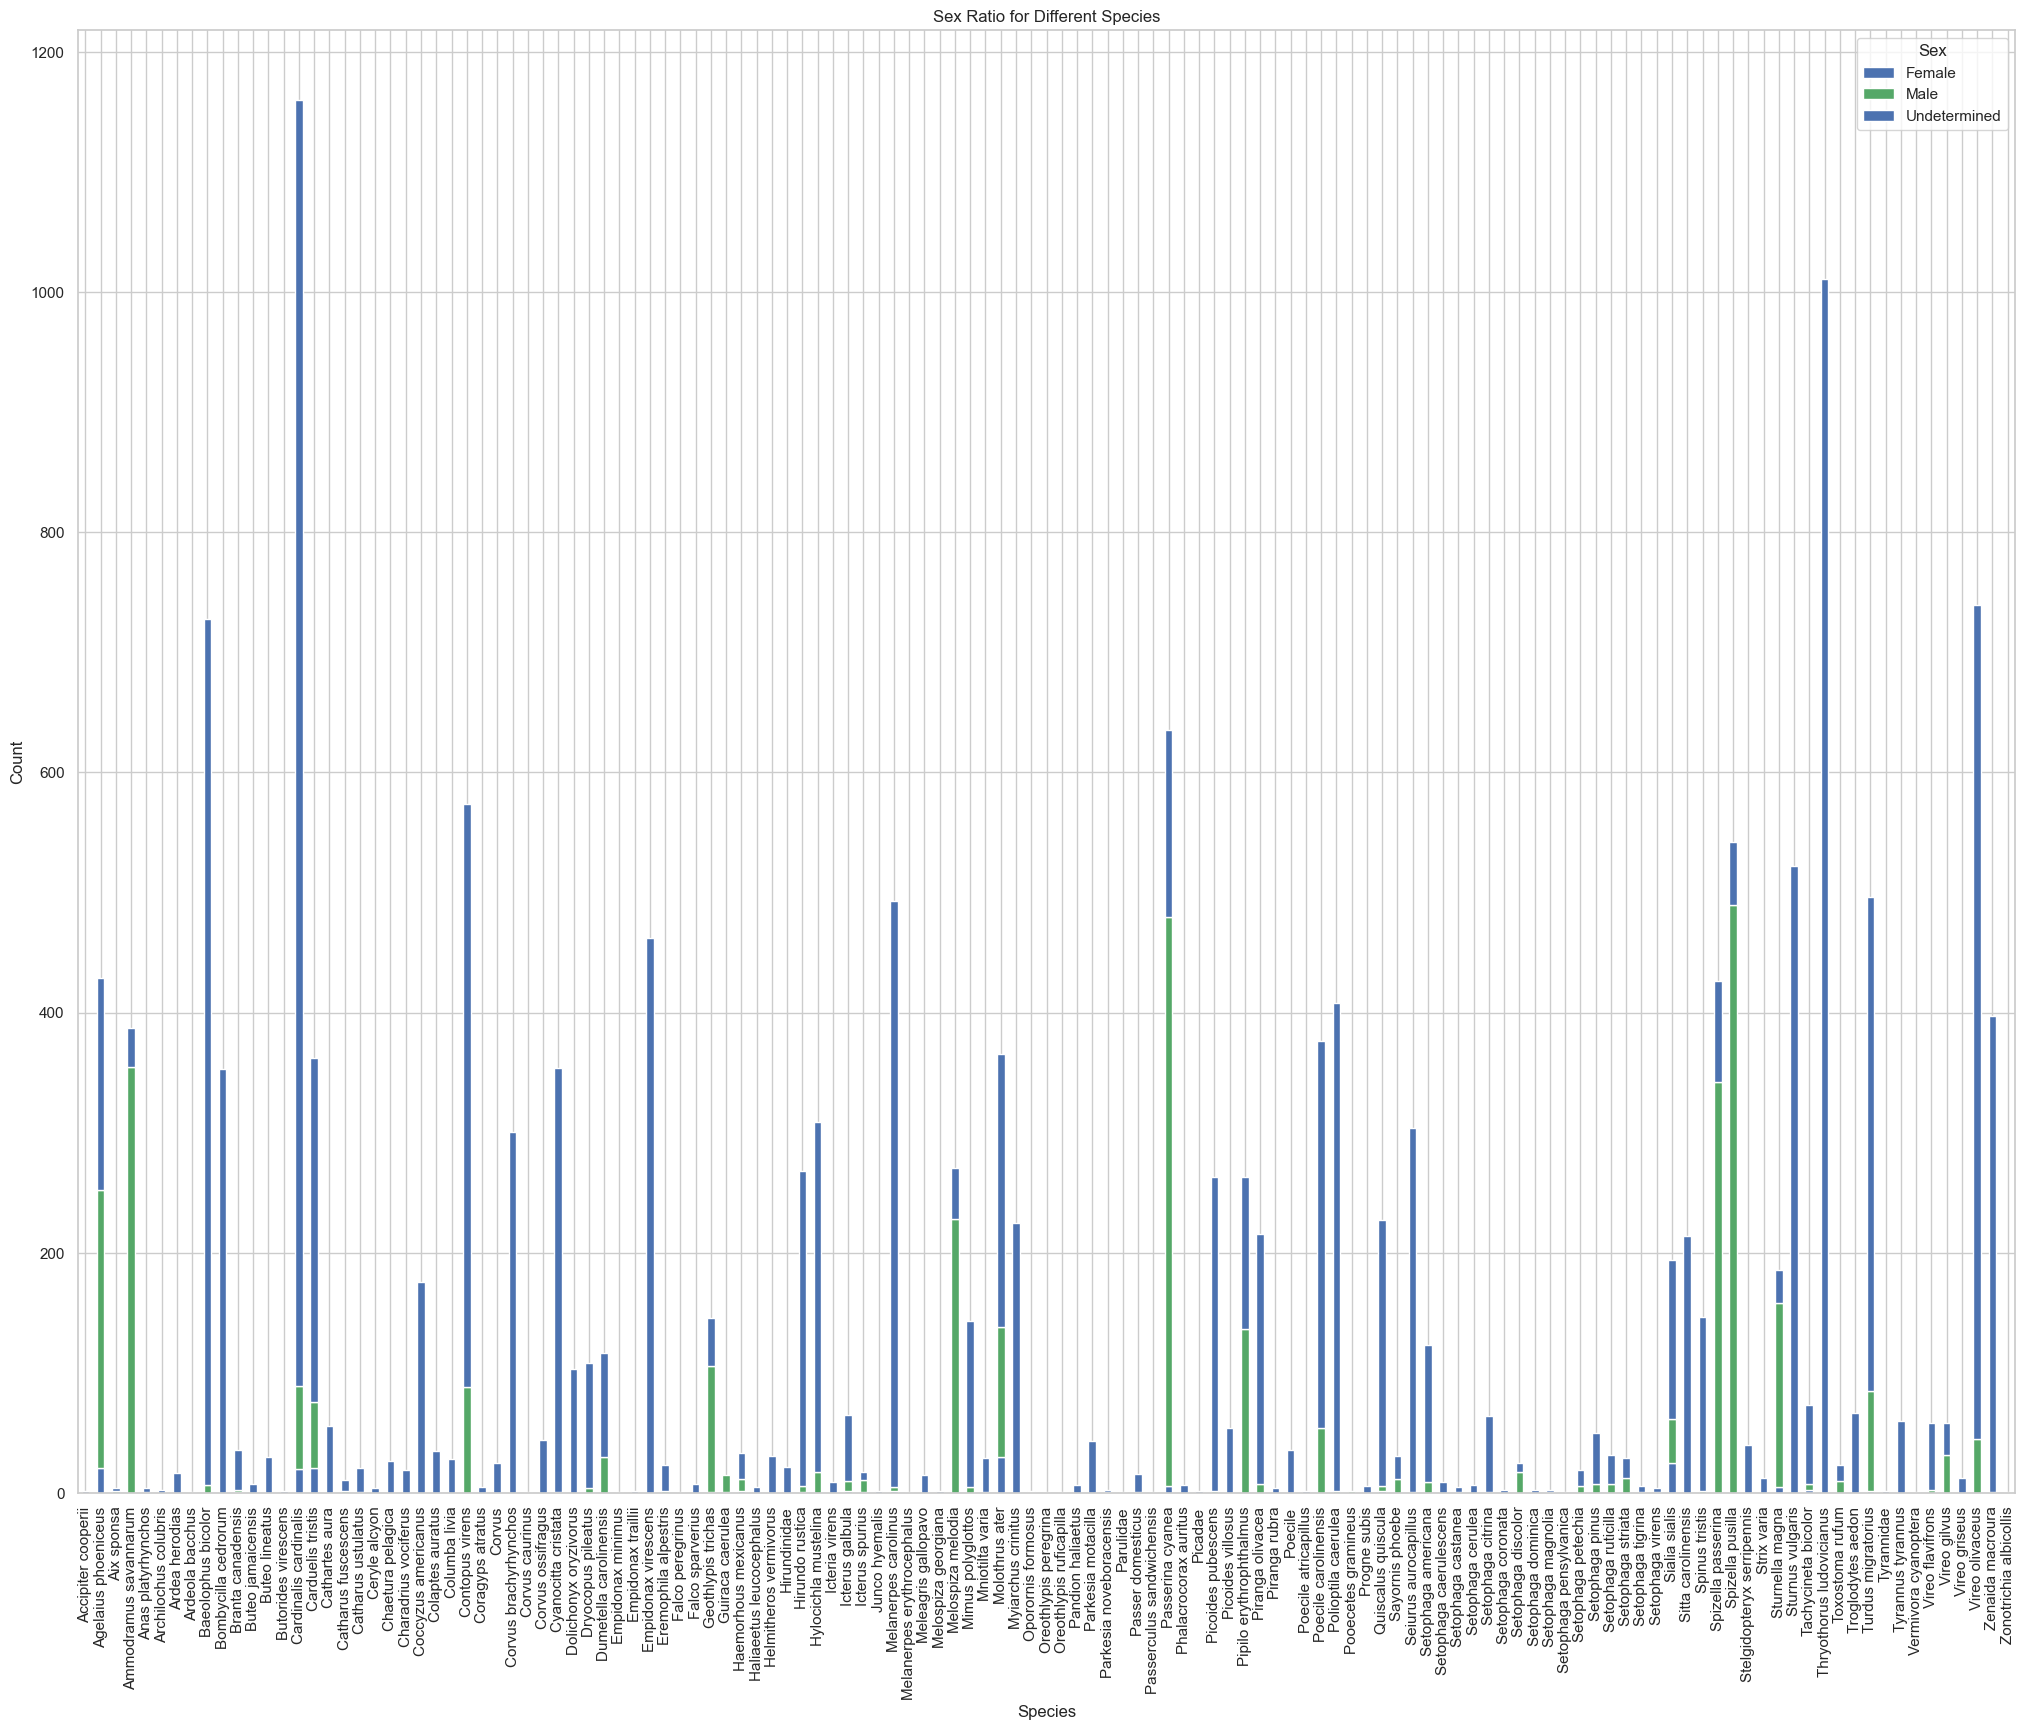

C:\Users\robin\AppData\Local\Temp\ipykernel_11708\1118321211.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Interval_Length', data=db, palette='viridis')


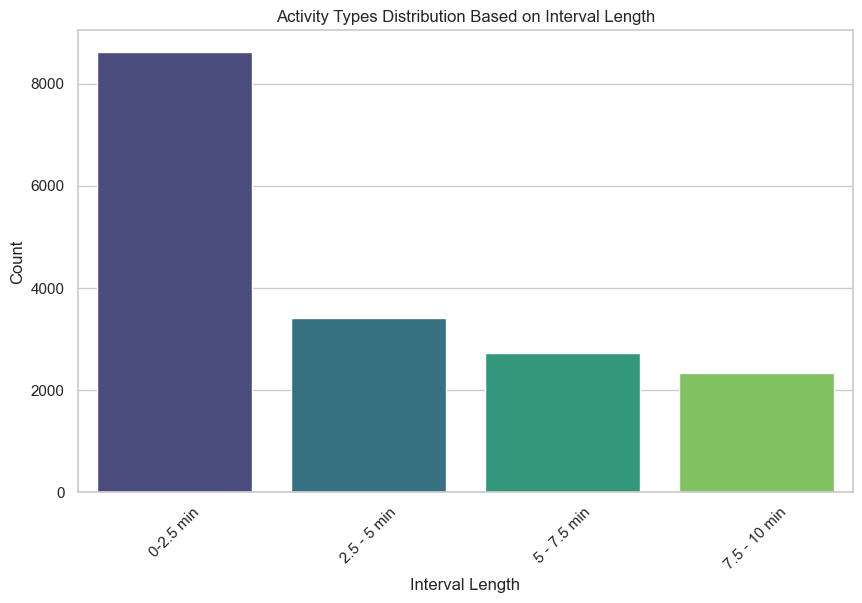

In [62]:
#3.Species Analysis

singing_activity = db[db['ID_Method'] == 'Singing']


# 1. Species Analysis - Diversity Metrics
species_count = db['Scientific_Name'].nunique()  # Count unique species
print(f"Unique species observed: {species_count}")

# Distribution of species across different Location_Type
species_distribution = db.groupby('Location_Type')['Scientific_Name'].nunique()
print("Species distribution across Location_Type:")
print(species_distribution)

# 2. Activity Patterns - Identify most common activity types
activity_counts = db['Interval_Length'].value_counts()
print(f"Most common activity types based on Interval_Length:\n{activity_counts}")

# Identify the most common method of observation
method_counts = db['ID_Method'].value_counts()
print(f"Most common methods of observation:\n{method_counts}")

# 3. Sex Ratio - Male to Female Ratio for different species
sex_ratio = db.groupby(['Scientific_Name', 'Sex']).size().unstack(fill_value=0)
print(f"Sex Ratio for different species:\n{sex_ratio}")

# 4. Singing Activity - Distribution of 'Singing' activities across Location_Type
print(f"Number of 'Singing' activities observed: {singing_activity.shape[0]}")


# Plotting the distribution of singing activities across Location_Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Location_Type', data=singing_activity, palette='Set2')
plt.title('Distribution of Singing Activity Across Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count of Singing Activities')
plt.xticks(rotation=45)
plt.show()
# Plotting the distribution of species across Location_Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Location_Type', data=db, palette='Set2')
plt.title('Species Distribution Across Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the sex ratio for different species
sex_ratio.plot(kind='bar', stacked=True, figsize=(25, 19), color=['#4c72b0', '#55a868'])
plt.title('Sex Ratio for Different Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Activity patterns visualization - Interval_Length
plt.figure(figsize=(10, 6))
sns.countplot(x='Interval_Length', data=db, palette='viridis')
plt.title('Activity Types Distribution Based on Interval Length')
plt.xlabel('Interval Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\robin\AppData\Local\Temp\ipykernel_11708\1599943927.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_filtered['Distance'] = db_filtered['Distance'].astype(str)


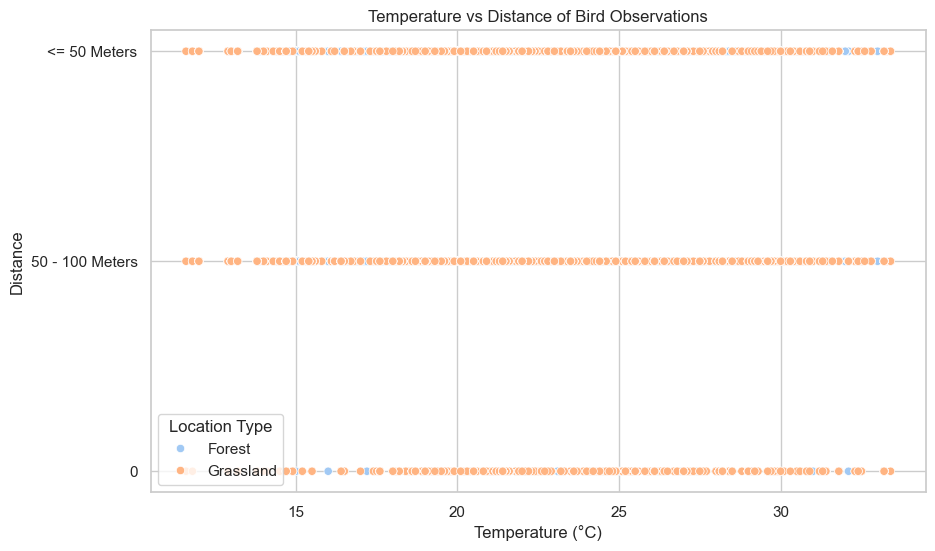

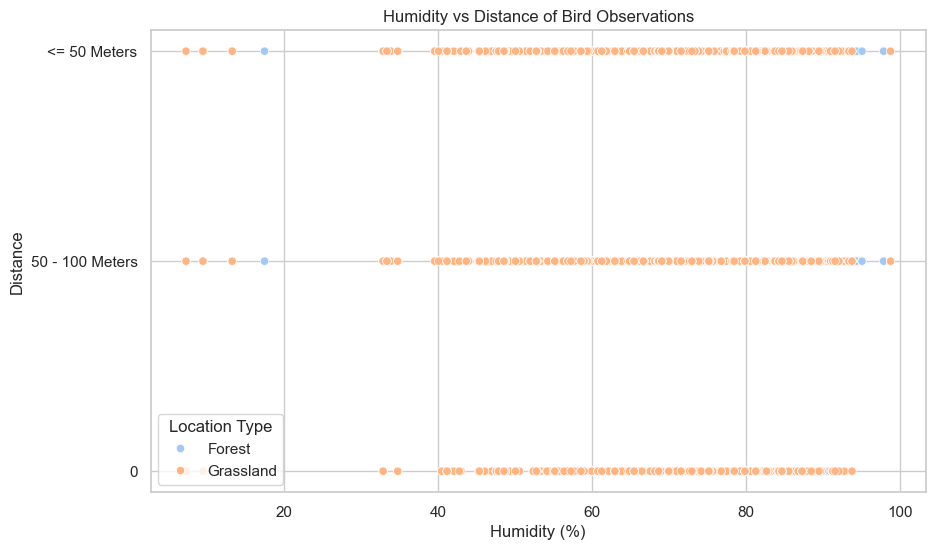

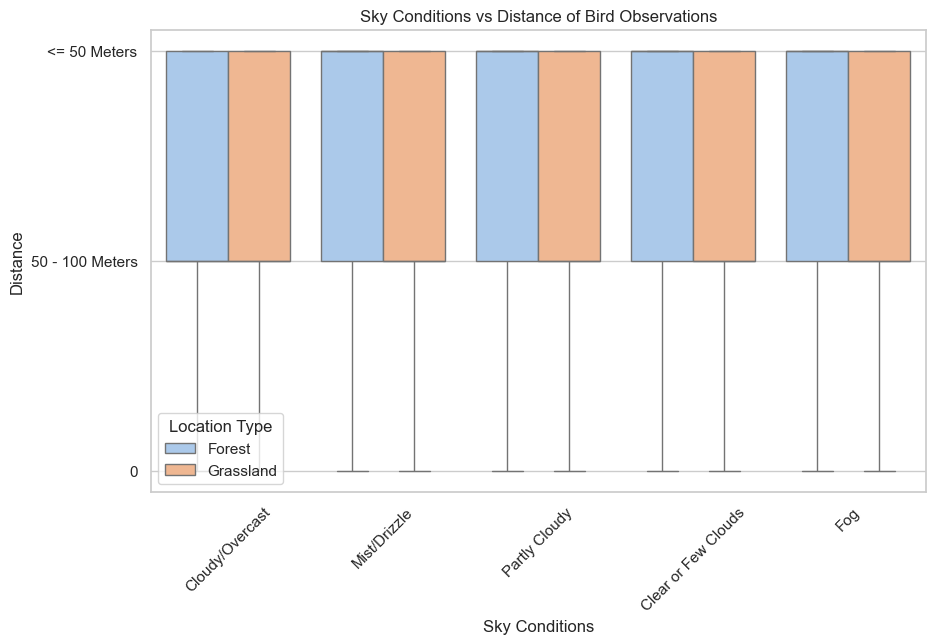

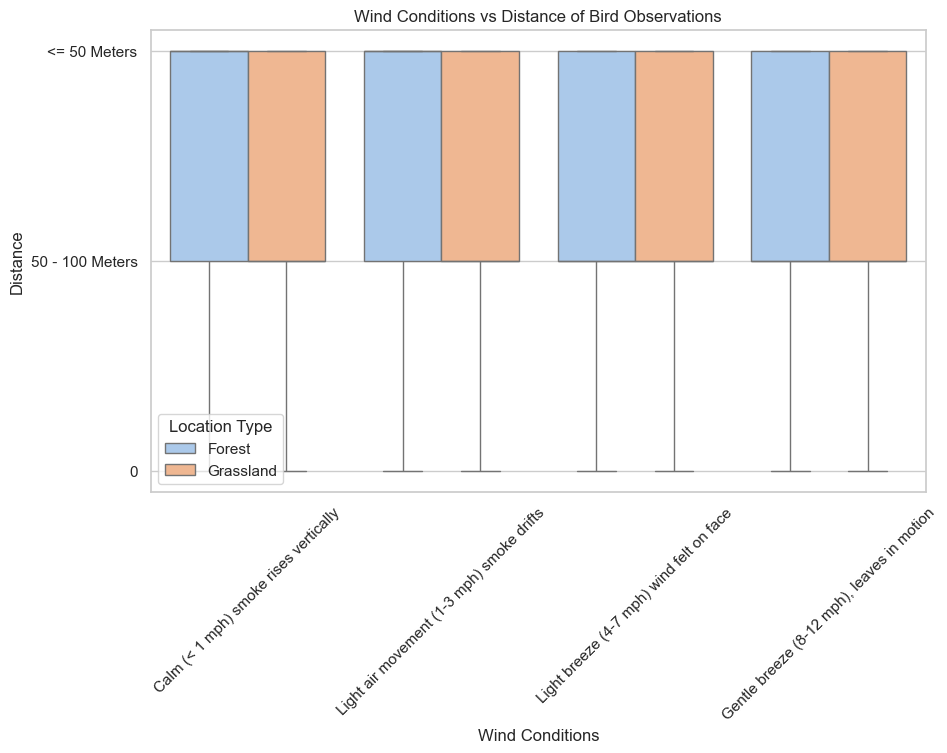

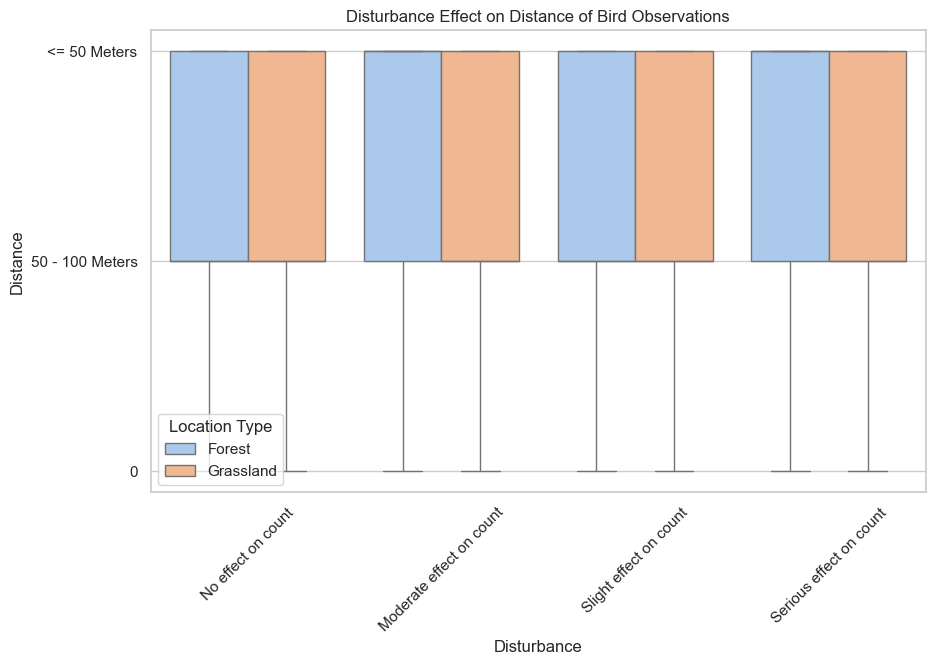

In [ ]:
#4. Environmental Conditions


# Convert 'Distance' column to string type
db_filtered['Distance'] = db_filtered['Distance'].astype(str)

# Correlation between Temperature and Number of Birds Observed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=db_filtered, x='Temperature', y='Distance', hue='Location_Type')
plt.title('Temperature vs Distance of Bird Observations')
plt.xlabel('Temperature (°C)')
plt.ylabel('Distance')
plt.legend(title='Location Type')
plt.show()

# Correlation between Humidity and Number of Birds Observed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=db_filtered, x='Humidity', y='Distance', hue='Location_Type')
plt.title('Humidity vs Distance of Bird Observations')
plt.xlabel('Humidity (%)')
plt.ylabel('Distance')
plt.legend(title='Location Type')
plt.show()

# Impact of Sky Conditions on Bird Observations
plt.figure(figsize=(10, 6))
sns.boxplot(data=db_filtered, x='Sky', y='Distance', hue='Location_Type')
plt.title('Sky Conditions vs Distance of Bird Observations')
plt.xlabel('Sky Conditions')
plt.ylabel('Distance')
plt.legend(title='Location Type')
plt.xticks(rotation=45)
plt.show()

# Impact of Wind Conditions on Bird Observations
plt.figure(figsize=(10, 6))
sns.boxplot(data=db_filtered, x='Wind', y='Distance', hue='Location_Type')
plt.title('Wind Conditions vs Distance of Bird Observations')
plt.xlabel('Wind Conditions')
plt.ylabel('Distance')
plt.legend(title='Location Type')
plt.xticks(rotation=45)
plt.show()

# Disturbance Effect: Assess the impact of Disturbance on bird sightings
plt.figure(figsize=(10, 6))
sns.boxplot(data=db_filtered, x='Disturbance', y='Distance', hue='Location_Type')
plt.title('Disturbance Effect on Distance of Bird Observations')
plt.xlabel('Disturbance')
plt.ylabel('Distance')
plt.legend(title='Location Type')
plt.xticks(rotation=45)
plt.show()

              Scientific_Name  count
12      Cardinalis cardinalis    569
98   Thryothorus ludovicianus    441
108           Vireo olivaceus    325
6          Baeolophus bicolor    325
68        Polioptila caerulea    307
31        Empidonax virescens    286
101        Turdus migratorius    268
57           Passerina cyanea    266
2       Ammodramus savannarum    240
67       Poecile carolinensis    230
49             Molothrus ater    227
43       Melanerpes carolinus    223
92           Spizella pusilla    198
13          Carduelis tristis    180
91         Spizella passerina    171
21            Contopus virens    159
0         Agelaius phoeniceus    154
60         Picoides pubescens    144
72       Seiurus aurocapillus    125
50         Myiarchus crinitus    120
88              Sialia sialis    114
109          Zenaida macroura    110
90             Spinus tristis    109
38       Hylocichla mustelina    103
62    Pipilo erythrophthalmus     99
37            Hirundo rustica     96
8

C:\Users\robin\AppData\Local\Temp\ipykernel_11708\2863526189.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=species_within_50m.head(50), x='count', y='Scientific_Name', palette='viridis')


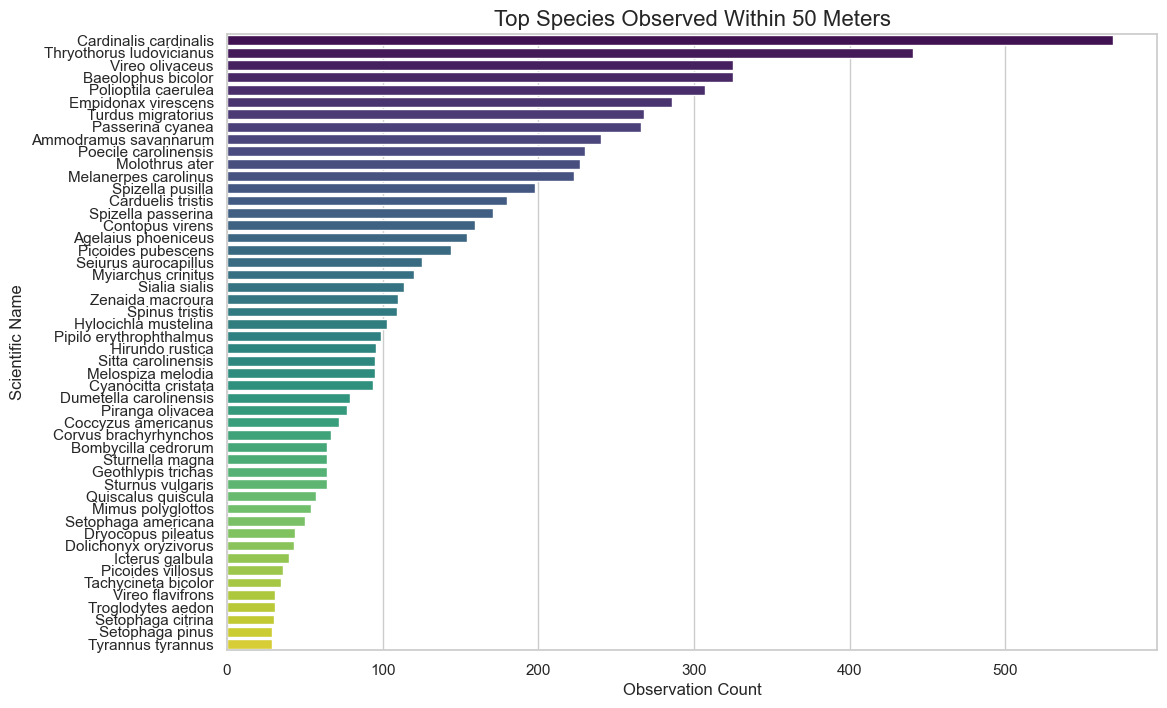

In [116]:
#5. Distance and Behavior

# Filter the data for observations within 50 meters
distance_within_50m = db[db['Distance'] == '<= 50 Meters']

# Group by species and count the number of observations for each species
species_within_50m = distance_within_50m.groupby('Scientific_Name').size().reset_index(name='count')

# Sort the species by the count of observations in descending order
species_within_50m = species_within_50m.sort_values(by='count', ascending=False)

# Display the top species observed within 50 meters
print(species_within_50m.head(50))

# Plot the top species observed within 50 meters
plt.figure(figsize=(12, 8))
sns.barplot(data=species_within_50m.head(50), x='count', y='Scientific_Name', palette='viridis')
plt.title('Top Species Observed Within 50 Meters', fontsize=16)
plt.xlabel('Observation Count', fontsize=12)
plt.ylabel('Scientific Name', fontsize=12)
plt.show()

C:\Users\robin\AppData\Local\Temp\ipykernel_11708\1670806704.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flyover_counts.index, y=flyover_counts.values, palette='viridis')


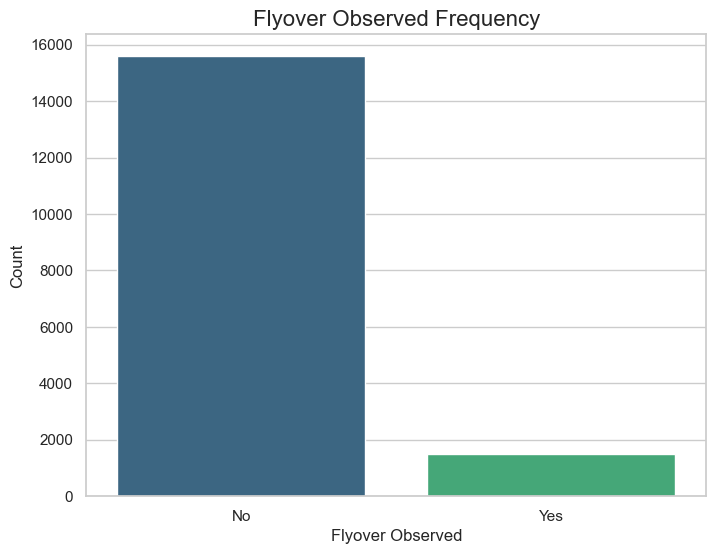

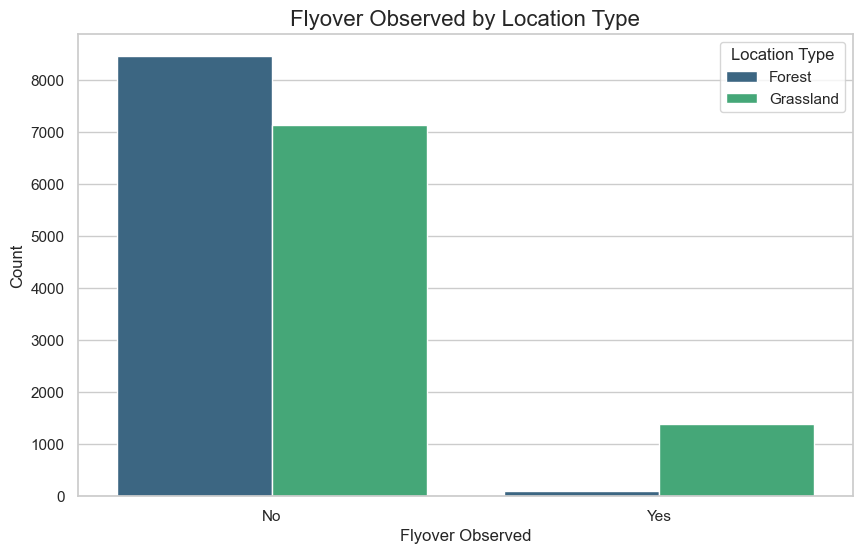

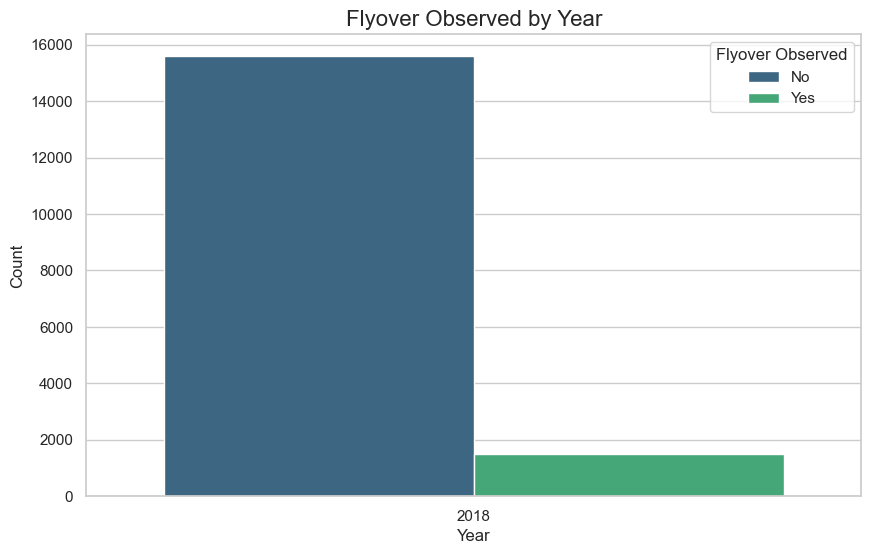

In [117]:
# EDA: Flyover Frequency

# Count the occurrences of Flyover_Observed
flyover_counts = db['Flyover_Observed'].value_counts()

# Plot the Flyover_Observed counts
plt.figure(figsize=(8, 6))
sns.barplot(x=flyover_counts.index, y=flyover_counts.values, palette='viridis')
plt.title('Flyover Observed Frequency', fontsize=16)
plt.xlabel('Flyover Observed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Analyze Flyover_Observed by Location_Type
plt.figure(figsize=(10, 6))
sns.countplot(data=db, x='Flyover_Observed', hue='Location_Type', palette='viridis')
plt.title('Flyover Observed by Location Type', fontsize=16)
plt.xlabel('Flyover Observed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Location Type')
plt.show()

# Analyze Flyover_Observed by Year
plt.figure(figsize=(10, 6))
sns.countplot(data=db, x='Year', hue='Flyover_Observed', palette='viridis')
plt.title('Flyover Observed by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Flyover Observed', labels=['No', 'Yes'])
plt.show()

Observation counts by each observer:
Observer
Elizabeth Oswald    6391
Kimberly Serno      5902
Brian Swimelar      4784
Name: count, dtype: int64


C:\Users\robin\AppData\Local\Temp\ipykernel_11708\4132391803.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_species_observer = df.groupby(['Observer', 'Scientific_Name']).size().reset_index(name='count')
C:\Users\robin\AppData\Local\Temp\ipykernel_11708\4132391803.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_species_observer = top_species_observer.sort_values(by='count', ascending=False).groupby('Observer').head(10)


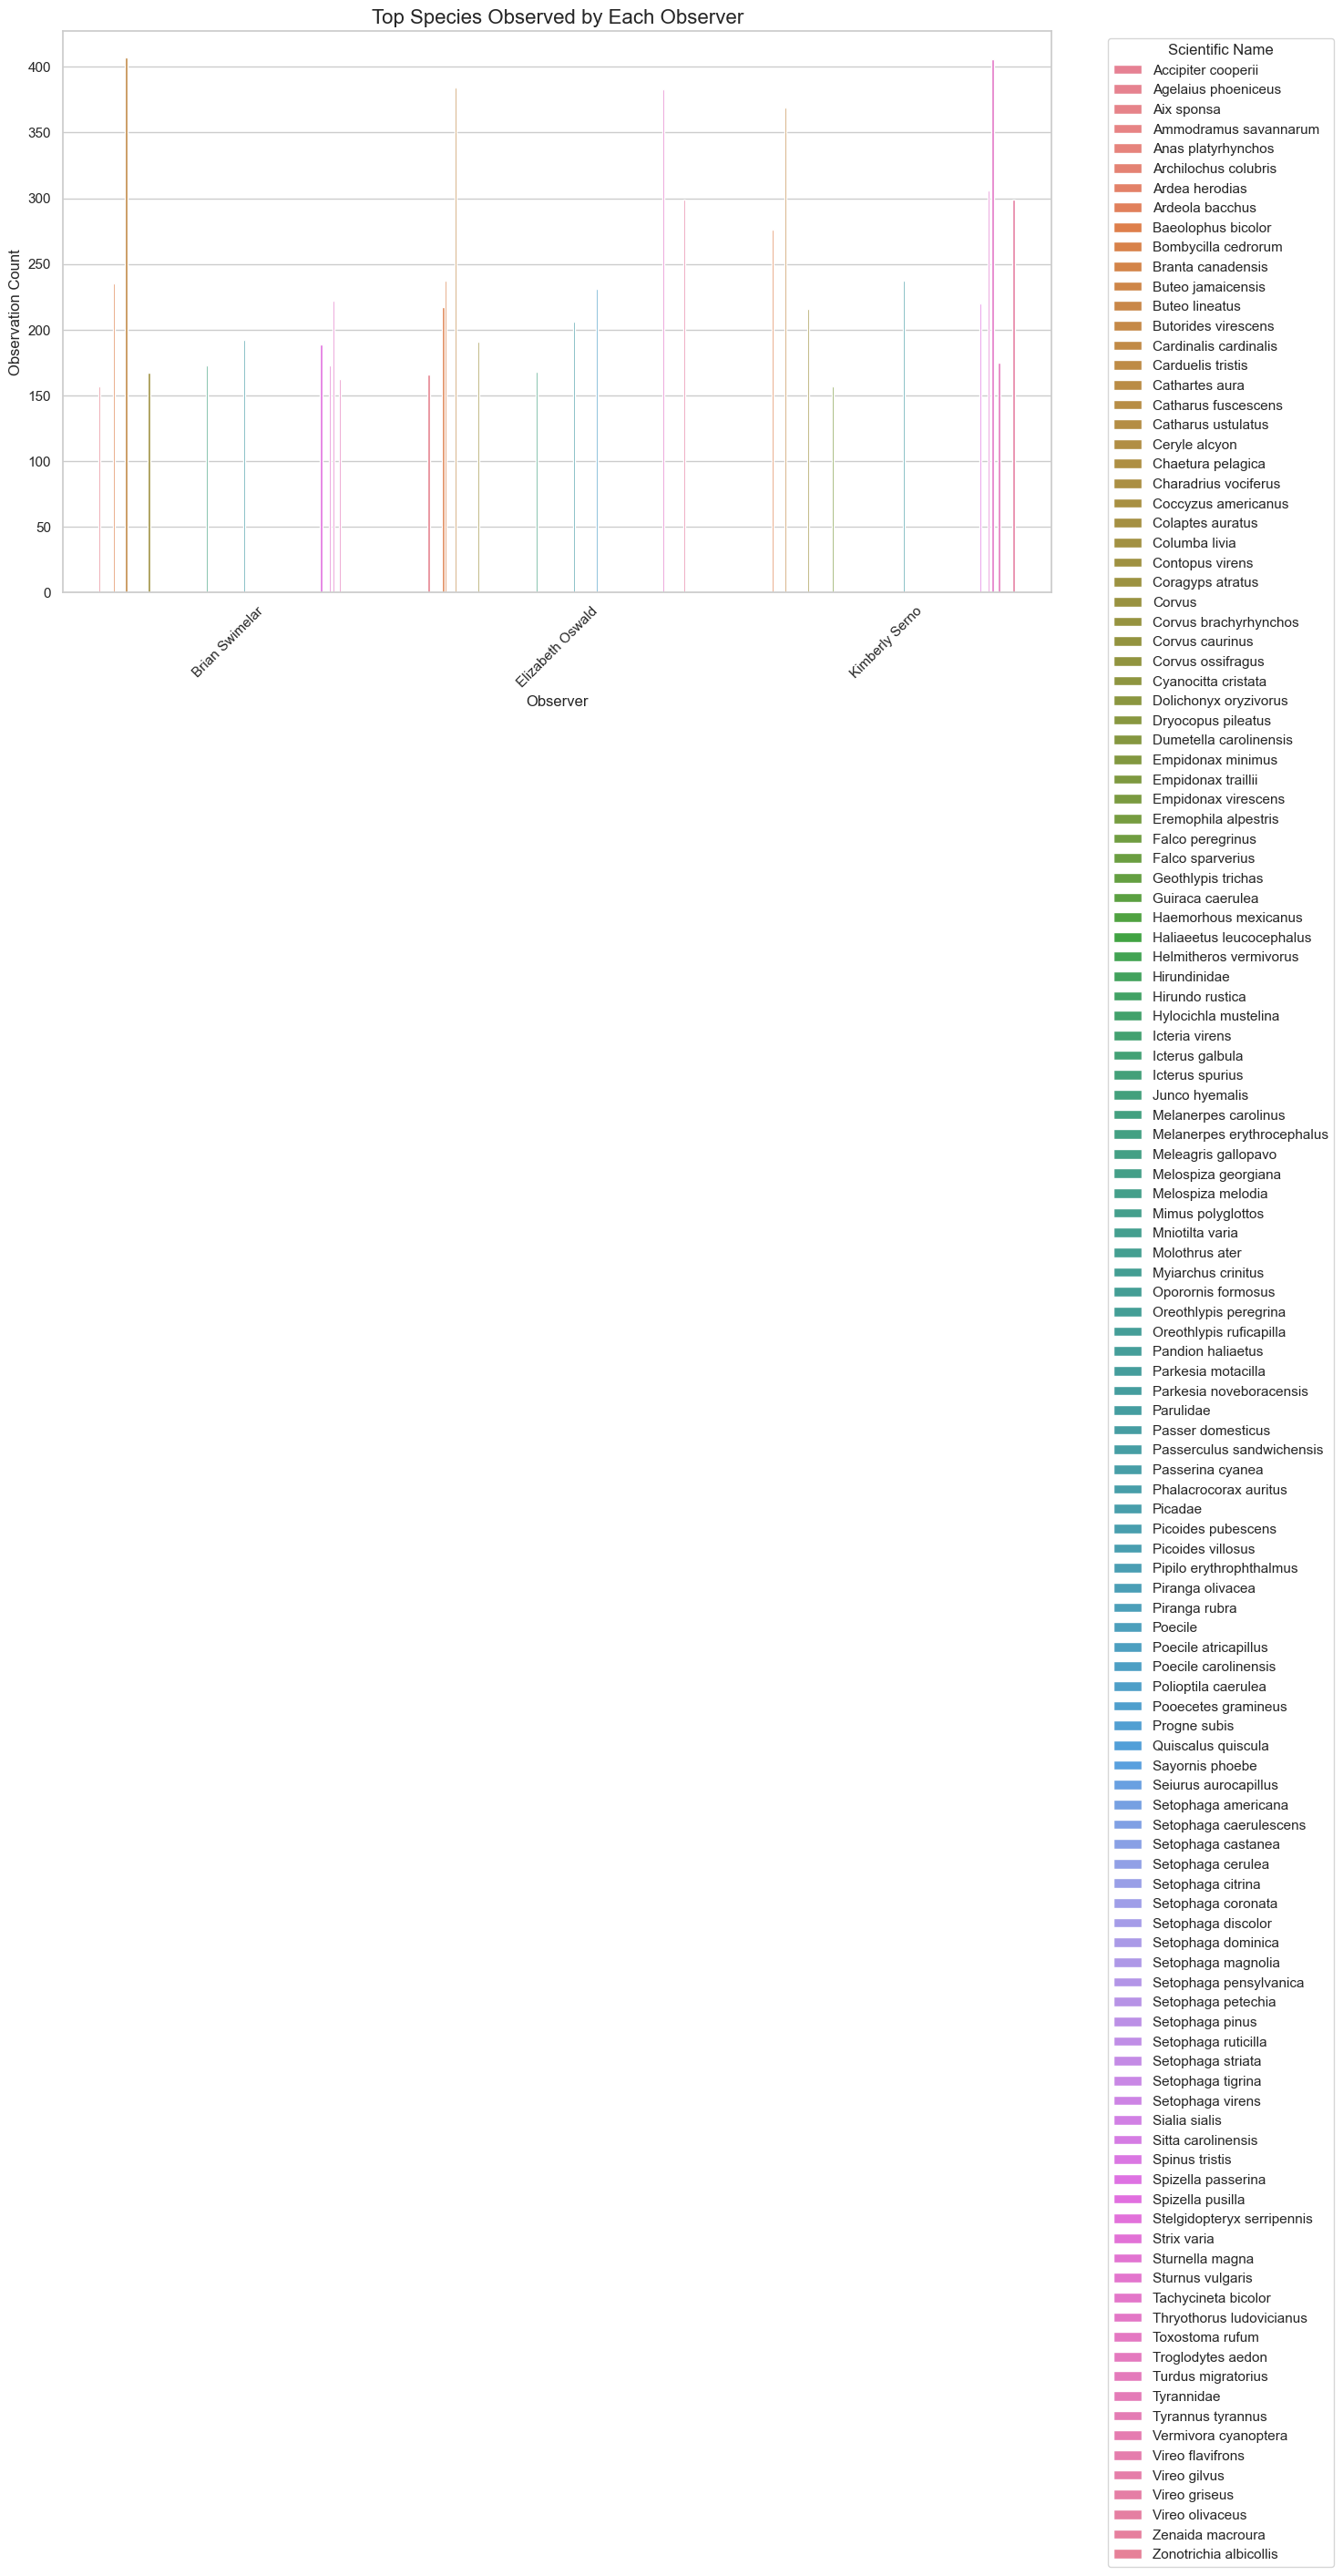

In [ ]:
#6. Observer Trends


observer_counts = df['Observer'].value_counts()
print("Observation counts by each observer:")
print(observer_counts)

# Top species observed by each observer
top_species_observer = df.groupby(['Observer', 'Scientific_Name']).size().reset_index(name='count')
top_species_observer = top_species_observer.sort_values(by='count', ascending=False).groupby('Observer').head(10)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_species_observer, x='Observer', y='count', hue='Scientific_Name')
plt.title('Top Species Observed by Each Observer', fontsize=16)
plt.xlabel('Observer', fontsize=12)
plt.ylabel('Observation Count', fontsize=12)
plt.legend(title='Scientific Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()



C:\Users\robin\AppData\Local\Temp\ipykernel_11708\3225928319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visit_species_count, x='Visit', y='Unique_Species_Count', palette='viridis')


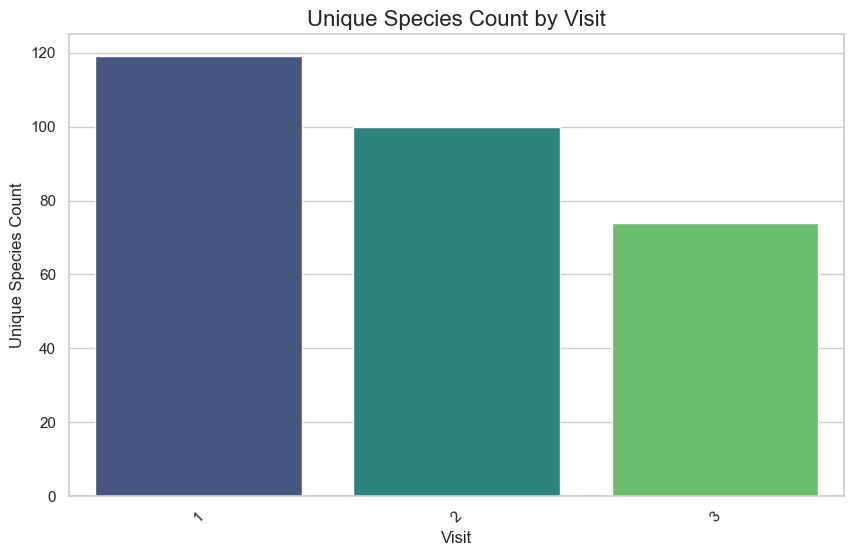

In [ ]:
#Visit Patterns: 
# Group by 'Visit' and calculate the number of unique species observed during each visit
visit_species_count = db.groupby('Visit')['Scientific_Name'].nunique().reset_index()
visit_species_count.columns = ['Visit', 'Unique_Species_Count']

# Plot the number of unique species observed during each visit
plt.figure(figsize=(10, 6))
sns.barplot(data=visit_species_count, x='Visit', y='Unique_Species_Count', palette='viridis')
plt.title('Unique Species Count by Visit', fontsize=16)
plt.xlabel('Visit', fontsize=12)
plt.ylabel('Unique Species Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Number of at-risk species: 25
At-risk species distribution across Location_Type:
Location_Type
Forest       23
Grassland    18
Name: Scientific_Name, dtype: int64


C:\Users\robin\AppData\Local\Temp\ipykernel_11708\2457859503.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  at_risk_species_distribution = at_risk_species.groupby('Location_Type')['Scientific_Name'].nunique()
C:\Users\robin\AppData\Local\Temp\ipykernel_11708\2457859503.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location_Type', data=at_risk_species, palette='Set2')


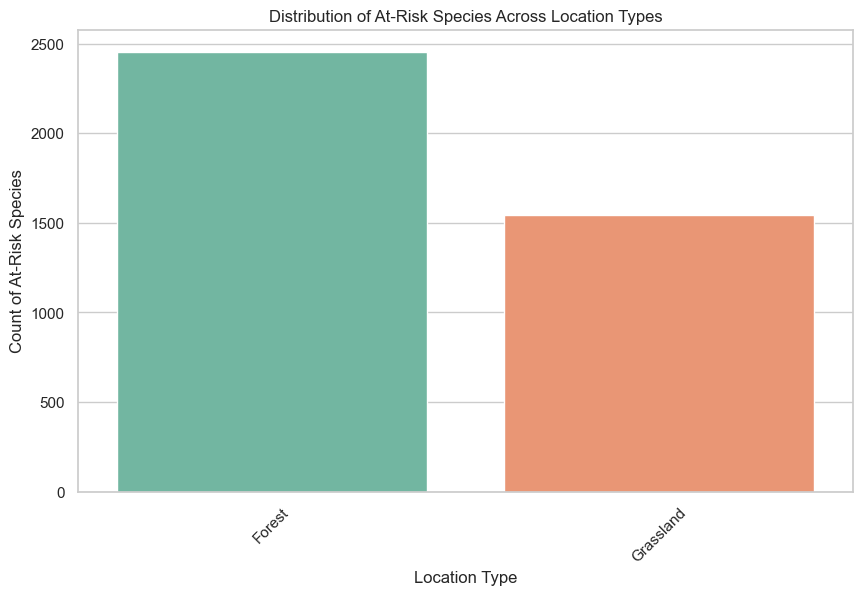

C:\Users\robin\AppData\Local\Temp\ipykernel_11708\2457859503.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=at_risk_species, palette='Set2')


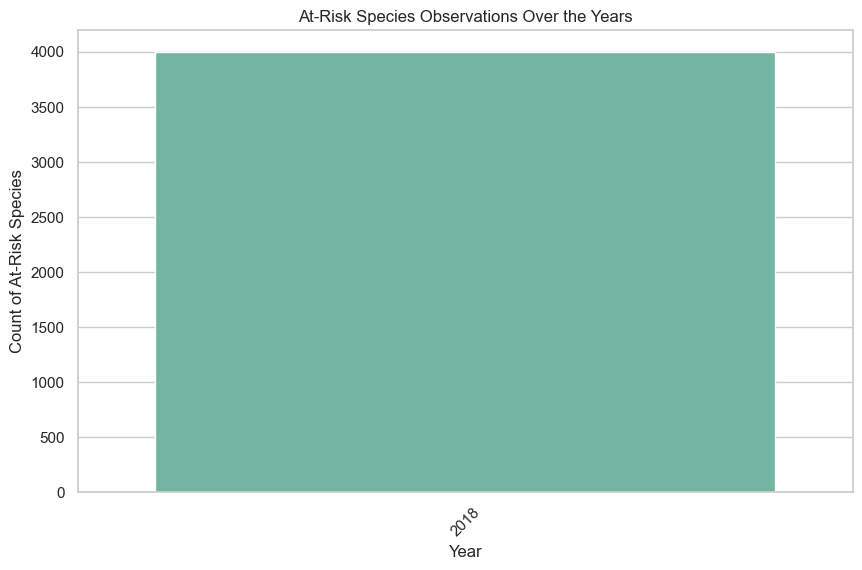

In [126]:
# Filter the data for at-risk species based on PIF_Watchlist_Status and Regional_Stewardship_Status
at_risk_species = db[(db['PIF_Watchlist_Status'] == True) | (db['Regional_Stewardship_Status'] == True)]

# Count the number of at-risk species
at_risk_species_count = at_risk_species['Scientific_Name'].nunique()
print(f"Number of at-risk species: {at_risk_species_count}")

# Distribution of at-risk species across different Location_Type
at_risk_species_distribution = at_risk_species.groupby('Location_Type')['Scientific_Name'].nunique()
print("At-risk species distribution across Location_Type:")
print(at_risk_species_distribution)

# Plotting the distribution of at-risk species across Location_Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Location_Type', data=at_risk_species, palette='Set2')
plt.title('Distribution of At-Risk Species Across Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count of At-Risk Species')
plt.xticks(rotation=45)
plt.show()

# Plotting the number of at-risk species observed over the years
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=at_risk_species, palette='Set2')
plt.title('At-Risk Species Observations Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of At-Risk Species')
plt.xticks(rotation=45)
plt.show()

    AOU_Code  Observation_Count
71      NOCA               1160
27      CARW               1011
87      REVI                739
47      ETTI                728
62      INBU                635
46      EAWP                574
50      FISP                542
48      EUST                522
2       AMGO                509
5       AMRO                496
86      RBWO                493
0       ACFL                462
93      RWBL                429
31      CHSP                426
14      BGGN                408
69      MODO                397
55      GRSP                387
25      CACH                376
15      BHCO                366
17      BLJA                354
28      CEDW                353
118     WOTH                309
80      OVEN                304
1       AMCR                301
96      SOSP                271
9       BARS                268
40      DOWO                263
45      EATO                263
34      COGR                227
52      GCFL                225


C:\Users\robin\AppData\Local\Temp\ipykernel_11708\3424609352.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aou_code_distribution.head(30), x='Observation_Count', y='AOU_Code', palette='viridis')


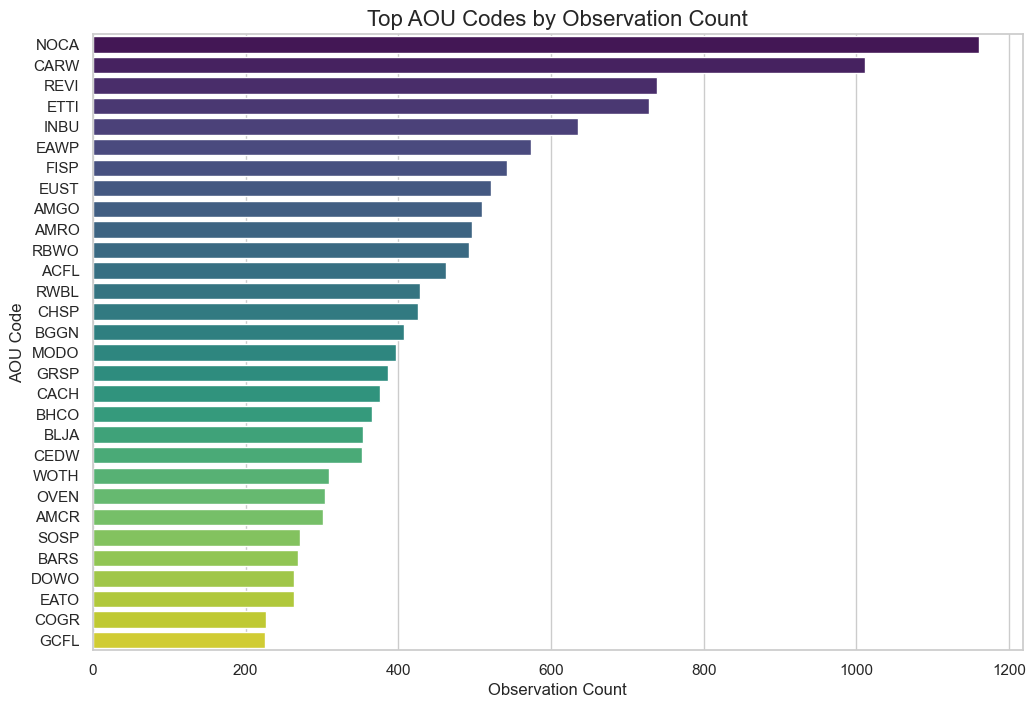

  AOU_Code  Observation_Count  PIF_Watchlist_Status  \
0     NOCA               1160                     0   
1     CARW               1011                     0   
2     REVI                739                     0   
3     ETTI                728                     0   
4     INBU                635                     0   
5     EAWP                574                     0   
6     FISP                542                     0   
7     EUST                522                     0   
8     AMGO                509                     0   
9     AMRO                496                     0   

   Regional_Stewardship_Status  
0                            0  
1                            0  
2                            0  
3                            0  
4                          635  
5                          574  
6                          542  
7                            0  
8                            0  
9                            0  


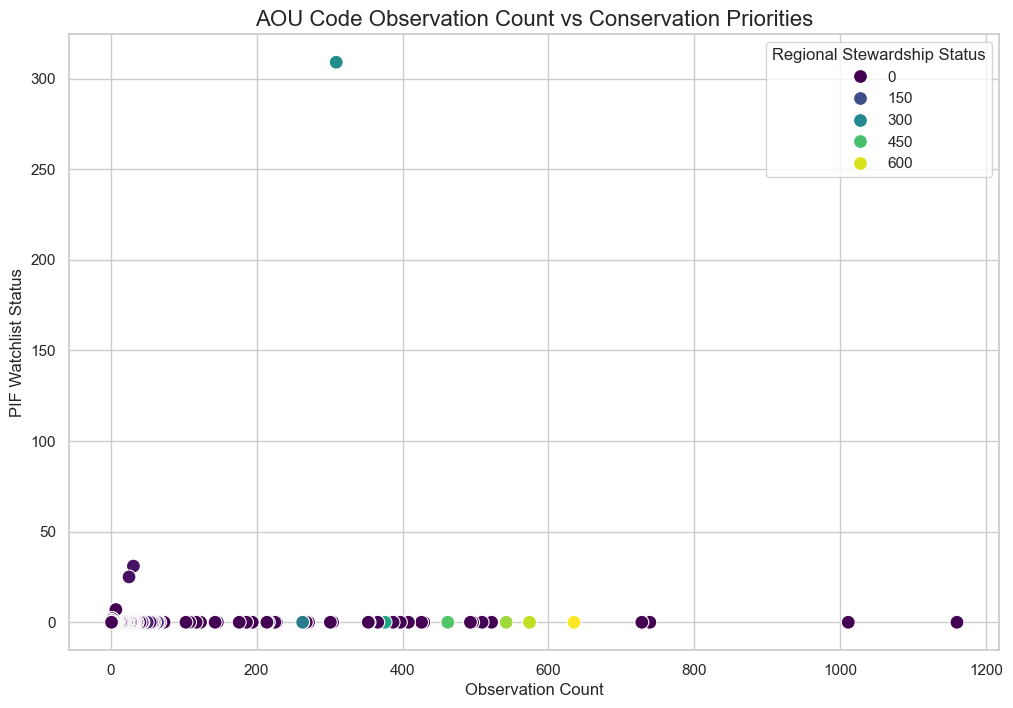

In [ ]:
#AOU Code Patterns

# Group by AOU_Code and count the number of observations for each code
aou_code_distribution = filtered_data.groupby('AOU_Code')['Scientific_Name'].count().reset_index(name='Observation_Count')

# Sort the distribution by the number of observations in descending order
aou_code_distribution = aou_code_distribution.sort_values(by='Observation_Count', ascending=False)

# Display the top AOU_Codes
print(aou_code_distribution.head(30))

# Plot the distribution of AOU_Codes
plt.figure(figsize=(12, 8))
sns.barplot(data=aou_code_distribution.head(30), x='Observation_Count', y='AOU_Code', palette='viridis')
plt.title('Top AOU Codes by Observation Count', fontsize=16)
plt.xlabel('Observation Count', fontsize=12)
plt.ylabel('AOU Code', fontsize=12)
plt.show()

# Correlate AOU_Code with conservation priorities
# Assuming 'PIF_Watchlist_Status' and 'Regional_Stewardship_Status' are indicators of conservation priorities
conservation_priority = filtered_data.groupby('AOU_Code')[['PIF_Watchlist_Status', 'Regional_Stewardship_Status']].apply(lambda x: x.astype(int).sum()).reset_index()

# Merge the distribution with conservation priorities
aou_code_conservation = pd.merge(aou_code_distribution, conservation_priority, on='AOU_Code')

# Display the correlation
print(aou_code_conservation.head(10))   

# Plot the correlation between AOU_Code and conservation priorities
plt.figure(figsize=(12, 8))
sns.scatterplot(data=aou_code_conservation, x='Observation_Count', y='PIF_Watchlist_Status', hue='Regional_Stewardship_Status', palette='viridis', s=100)
plt.title('AOU Code Observation Count vs Conservation Priorities', fontsize=16)
plt.xlabel('Observation Count', fontsize=12)
plt.ylabel('PIF Watchlist Status', fontsize=12)
plt.legend(title='Regional Stewardship Status')
plt.show()